In [1]:
from HOHWM import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
f = lambda x: np.sin(np.pi * x)
K = lambda x, t, u: 1/5 * np.cos(np.pi * x) * np.sin(np.pi * t) * (u ** 3)
u_true = lambda x: np.sin(np.pi * x) + 1/3 * (20 - np.sqrt(391)) * np.cos(np.pi * x)

In [3]:
from scipy import integrate

x_list = np.random.rand(1000)
result_list = np.zeros(1000)
for i, x in enumerate(x_list):
    result_list[i] = u_true(x) - f(x) - integrate.quad(lambda t: K(x, t, u_true(t)), 0, 1)[0]
result_list = np.abs(result_list)
print(np.max(result_list))

3.3306690738754696e-16


<Figure size 1800x1200 with 0 Axes>

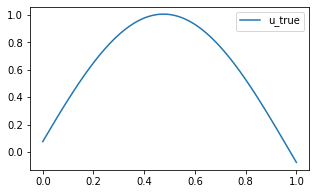

In [4]:
# plot u_true with dpi = 300
x = np.linspace(0, 1, 100)
plt.figure(dpi=300)
plt.figure(figsize=(5, 3))
plt.plot(x, u_true(x), label='u_true')
plt.legend()
plt.show()

In [5]:
def system_equations(vars):
    C1 = vars[0]
    coef_haar = vars[1:]

    N = len(coef_haar)
    x = collocation(N)
    t = collocation(N)
    eqs = np.zeros(N + 1)
    
    # C1 part
    sigma_C1 = 0
    for k in range(N):
        for i in range(N):
            sigma_C1 += K(0, t[k], C1 + coef_haar[i] * haar_int_1(t[k], i + 1))
    eqs[0] = C1 - (f(0) + 1/N * sigma_C1)

    # Haar part
    sigma_LHS = np.zeros(N)
    sigma_RHS = np.zeros(N)
    for i in range(N):
        sigma_LHS += coef_haar[i] * haar_int_1(x, i + 1)
    for k in range(N):
        for i in range(N):
            sigma_RHS += K(x, t[k], C1 + coef_haar[i] * haar_int_1(t[k], i + 1))
    eqs[1:] = C1 + sigma_LHS - f(x) - 1/N * sigma_RHS
    return eqs


In [45]:
N = 64
vars = sp.optimize.root(system_equations, np.zeros(N + 1)).x
C1 = vars[0]
coef_haar = vars[1:]

In [46]:
u_haar_approx = np.zeros(N)
for k in range(N):
    u_haar_approx += coef_haar[k] * haar_int_1(collocation(N), k + 1)
u_haar_approx += C1

<Figure size 1800x1200 with 0 Axes>

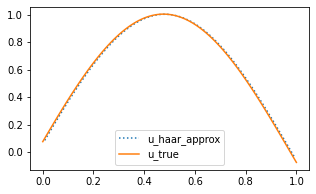

In [47]:
# plot u_haar_approx and true function on same plot with dpi = 300
x = np.linspace(0, 1, 101)
plt.figure(dpi=300)
plt.figure(figsize=(5, 3))
plt.plot(collocation(N), u_haar_approx, label='u_haar_approx', linestyle=':')
plt.plot(x, u_true(x), label='u_true')
plt.legend()
plt.show()

In [48]:
error = np.abs(u_haar_approx - u_true(collocation(N)))
error = np.linalg.norm(error)
error

0.08559285532409645